In [1]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, PolygonRegion, box_2d_center, line_seg_to_obstacle
from panav.viz import draw_env

import shapely
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

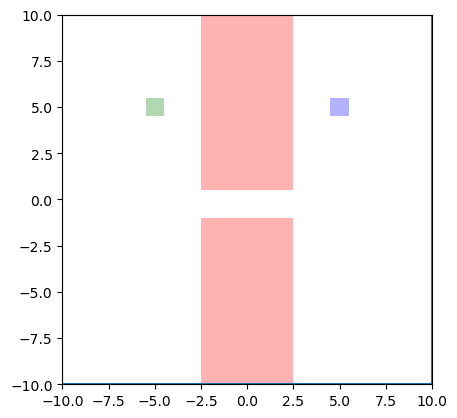

In [2]:

start_locs = np.array([[5,5]])
goal_locs = np.array([[-5,5]])


start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

starts = [box_2d_center(s,start_box_side) for s in start_locs]

goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,[O1,O2],starts,goals)

draw_env(env)

# The RRT algorithm: LaValle 1998

**Important primitive functions for RRT**

In [58]:
import shapely
def uniform_rand_loc(env):
    return np.random.uniform(low = [env.limits[0][0],env.limits[1][0]],
                    high = [env.limits[0][1],env.limits[1][1]])


def in_env_boundary(env,x,bloating_r):
    return env.limits[0][0]+bloating_r<=x[0]<=env.limits[0][1]-bloating_r\
          and env.limits[1][0]+bloating_r<=x[1]<=env.limits[1][1]-bloating_r
    
def has_point_collision(env,x,bloating_r):
    '''
        Output: whether putting an agent with bloating radius=bloating_r at location x in env induces collision.
    '''
    if in_env_boundary(env,x,bloating_r):
        for o in env.obstacles:           
            if shapely.Point(x).distance(o.vertices())<bloating_r:
                return True
        return False
    else:
        Warning("The test location x={} is not within the limits of the environment.".format(x))
        return True 

def has_line_collision(env,x1,x2,bloating_r):
    '''
        Output: whether the bloated line segment x1-x2 with bloating radius = bloating_r intersects with any of the obstacles in env.
    '''
    if in_env_boundary(env,x1,bloating_r) and in_env_boundary(env,x2,bloating_r):
        l = shapely.LineString([x1,x2]) 
        for o in env.obstacles:
            if l.distance(o.vertices())<bloating_r:
                return True
        return False
    else:
        Warning("The test locations may not be within the limits of the environment.")
        return True 

def binary_line_search(env,x_start,x_target,bloating_r,eta = None,eps = 1e-5):
    '''
        A heuristic to decide a new 
        Output: min_x ||x-x_target|| such that 
               0) x lies on x_start-x_target
               1) has_line_collision(env,x_tart,x,bloating_r) is False
               2) If eta is not None, then also ||x-x_start||<=eta. 
    '''
    lo = 0
    hi = 1

    return x_target

True


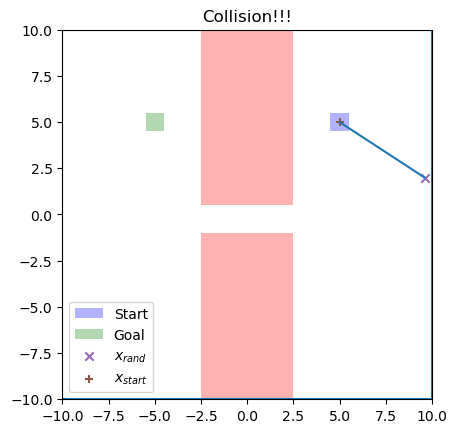

In [67]:
ax = plt.gca()
# x_rand = uniform_rand_loc(env)

x_rand = [9.6,2.0]


# coll = has_collision(env,x_rand,bloating_r)
coll = has_line_collision(env,start_locs[0],x_rand,bloating_r)
draw_env(env,ax=ax)



ax.scatter(*x_rand,marker = 'x',label = r'$x_{rand}$')
ax.scatter(*start_locs[0],marker = "+",label = r'$x_{start}$')
ax.plot([x_rand[0],start_locs[0][0]],[x_rand[1],start_locs[0][1]])


ax.set_title("Collision!!!" if coll else "No collision")
print(coll)
ax.legend()
plt.show()
